<a href="https://colab.research.google.com/github/Puru35/Black-Friday-Sales-Prediction/blob/master/Black_Friday_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the Third and final notebook in this project. In this notebook we will train various models to get the best accuracy while predicting the price of an item on black friday sale. 

The conclusion of the full project will be at the end of this notebook.

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import tensorflow as tf
from tensorflow import keras

## Importing the cleaned Dataset

In [0]:
data = pd.read_csv("Black Friday cleaned Data set.csv")

In [3]:
data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,55,10,2,2,0,3,0,0,8370
1,0,55,10,2,2,0,1,6,14,15200
2,0,55,10,2,2,0,12,0,0,1422
3,0,55,10,2,2,0,12,14,0,1057
4,1,55,16,0,4,0,8,0,0,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,53,13,1,1,1,20,0,0,368
550064,0,30,1,0,3,0,20,0,0,371
550065,0,30,15,1,4,1,20,0,0,137
550066,0,55,1,0,2,0,20,0,0,365


Here we are going to import the dataset that we cleaned in the first notebook.

In [4]:
data.isnull().any()

Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

Just to verify if there are any null values in our dataset after cleaning, we use isnull().any()

## Pearson Correlation between the target and rest of the features

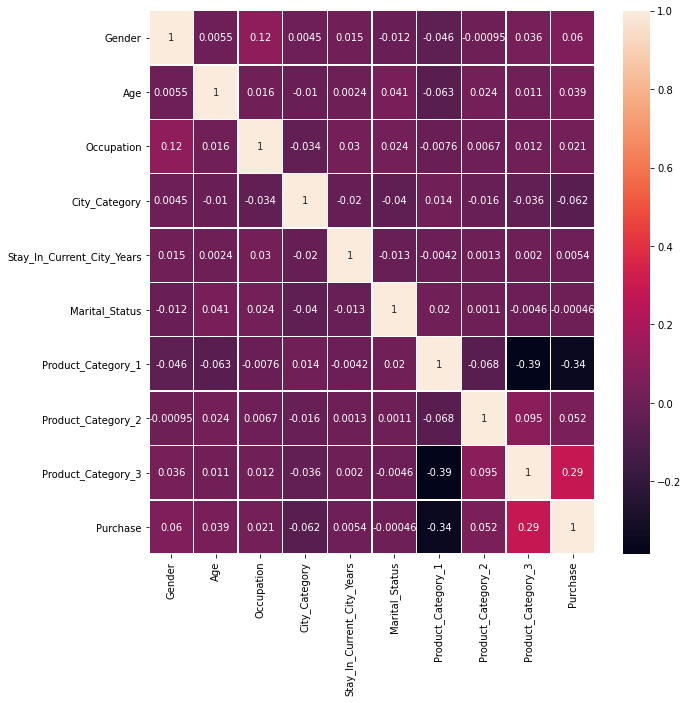

In [5]:
corrdf = data.corr('pearson')

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrdf, annot=True, linewidths=.5, ax=ax)

In [6]:
abs(data.corr("pearson")["Purchase"]).sort_values(ascending = False)

Purchase                      1.000000
Product_Category_1            0.343703
Product_Category_3            0.288501
City_Category                 0.061914
Gender                        0.060346
Product_Category_2            0.052288
Age                           0.038553
Occupation                    0.020833
Stay_In_Current_City_Years    0.005422
Marital_Status                0.000463
Name: Purchase, dtype: float64

Using the heatmap, and pearson correlation we try to find the linear correlation between each feature and the target. A few observations such as Product Category 1 attribute being negatively correlated, Occupation and Stay in Current Years being positively correlated can be seen.

## Normalizing the features

We will be using MinMaxScaler to bring each data point within the values of 0 and 1.

In [0]:
scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [8]:
dff

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.0,1.000000,0.50,1.0,0.50,0.0,0.105263,0.000000,0.000000,0.348992
1,0.0,1.000000,0.50,1.0,0.50,0.0,0.000000,0.333333,0.777778,0.634181
2,0.0,1.000000,0.50,1.0,0.50,0.0,0.578947,0.000000,0.000000,0.058875
3,0.0,1.000000,0.50,1.0,0.50,0.0,0.578947,0.777778,0.000000,0.043634
4,1.0,1.000000,0.80,0.0,1.00,0.0,0.368421,0.000000,0.000000,0.332248
...,...,...,...,...,...,...,...,...,...,...
550063,1.0,0.955556,0.65,0.5,0.25,1.0,1.000000,0.000000,0.000000,0.014865
550064,0.0,0.444444,0.05,0.0,0.75,0.0,1.000000,0.000000,0.000000,0.014990
550065,0.0,0.444444,0.75,0.5,1.00,1.0,1.000000,0.000000,0.000000,0.005219
550066,0.0,1.000000,0.05,0.0,0.50,0.0,1.000000,0.000000,0.000000,0.014740


In [0]:
features = dff[["Product_Category_1","Product_Category_3", "City_Category", "Gender", "Product_Category_2"]].values
target = dff['Purchase'].values

I am choosing these respective features after trial and error, so that they give a better value of test accuracy at the end. 

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.2)

We will use Train Test Split to get our respective train and test data.

## Model Training

Using our train and test data, we will now use 4 different methods of model training:

1. Linear Regression
2. Random Forest
3. Decision Tree
4. Gradient Boosting



### 1. Linear Regression

In [11]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
metrics.mean_absolute_error(ytest,ypred)

0.14699073633608867

In [12]:
print("Accuracy of Linear Regression on train set is: ",lr.score(xtrain,ytrain)*100)
print("Accuracy of Linear Regression on test set is: ",lr.score(xtest,ytest)*100)

Accuracy of Linear Regression on train set is:  15.189956233931468
Accuracy of Linear Regression on test set is:  14.915142001848858


As we can see, Linear Regression does not give a good accuracy at all, with highest of 15%, and an MSE or 0.14.

### 2. Random Forest

In [13]:
rfr = RandomForestRegressor(max_leaf_nodes=1200)
rfr.fit(xtrain, ytrain)
ypred1 = rfr.predict(xtest)
metrics.mean_absolute_error(ytest,ypred1)

0.09148673203550609

In [14]:
ytest

array([0.21833897, 0.32686125, 0.29475135, ..., 0.32807215, 0.65242808,
       0.48695144])

In [15]:
ypred1

array([0.24809349, 0.30637157, 0.25355327, ..., 0.56239476, 0.52794613,
       0.54006512])

In [17]:
print("Accuracy of Random Forests on train set is: ",rfr.score(xtrain,ytrain)*100)
print("Accuracy of Random Forests on test set is: ",rfr.score(xtest,ytest)*100)

Accuracy of Random Forests on train set is:  66.32358014900872
Accuracy of Random Forests on test set is:  65.93239861021556


After a lot of trial and error, I was able to bring up the test accuracy to 65.93%, with an MSE of 0.091. We also observe that the error decrased from Linear Regression to Random Forest, while the accuracies for both test and train increased.

### 3. Decision Tree

In [18]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)
ypred2 = dtr.predict(xtest)
metrics.mean_absolute_error(ytest,ypred2)


0.09148792777694059

In [19]:
ytest

array([0.21833897, 0.32686125, 0.29475135, ..., 0.32807215, 0.65242808,
       0.48695144])

In [20]:
ypred2

array([0.24788501, 0.30654245, 0.2532075 , ..., 0.56213536, 0.5278483 ,
       0.53973811])

In [21]:
print("Accuracy of Decision tree on train set is: ",dtr.score(xtrain,ytrain)*100)
print("Accuracy of Decision tree on test set is: ",dtr.score(xtest,ytest)*100)

Accuracy of Decision tree on train set is:  66.32519477827691
Accuracy of Decision tree on test set is:  65.9342091819476


After training the Decision Tree model, we observe that the MSE value and the accuracies are not that different from those of Random Forest.

### 4. Gradient Boosting

In [22]:
gbr = GradientBoostingRegressor()
gbr.fit(xtrain,ytrain)
ypred3 = gbr.predict(xtest)
metrics.mean_absolute_error(ytest,ypred3)

0.09443777754403088

In [23]:
ytest

array([0.21833897, 0.32686125, 0.29475135, ..., 0.32807215, 0.65242808,
       0.48695144])

In [24]:
ypred3

array([0.27779306, 0.30749852, 0.25507114, ..., 0.59518842, 0.54615189,
       0.54529712])

In [25]:
print("Accuracy of Gradient Boosting on train set is: ",gbr.score(xtrain,ytrain)*100)
print("Accuracy of Gradient Boosting on test set is: ",gbr.score(xtest,ytest)*100)

Accuracy of Gradient Boosting on train set is:  64.76804327045475
Accuracy of Gradient Boosting on test set is:  64.52218002387201


As seen above the accuracy values, and the MSE are almost similar to the previous two models. 

Even though Gradient Boosting and Random Forest follow different approches, they still have almost a similar output on this dataset.

## Summary of Model Training

In [26]:
pd.DataFrame({"Purchase" : ytest, "Linear Regression" : ypred, "Random Forest" : ypred1, "Decision Tree" : ypred2, "Gradient Boosting" : ypred3})


,Purchase,Linear Regression,Random Forest,Decision Tree,Gradient Boosting
0,0.218339,0.472838,0.248093,0.247885,0.277793
1,0.326861,0.312009,0.306372,0.306542,0.307499
2,0.294751,0.335336,0.253553,0.253208,0.255071
3,0.170654,0.314397,0.302315,0.302553,0.317690
4,0.296296,0.369886,0.252432,0.252441,0.255762
...,...,...,...,...,...
110009,0.408660,0.334614,0.310771,0.310548,0.317690
110010,0.024218,0.342636,0.027800,0.026754,0.027213
110011,0.328072,0.459079,0.562395,0.562135,0.595188
110012,0.652428,0.435700,0.527946,0.527848,0.546152


After training all the models, I have created a Data Frame which shows us the prediction values for the test data, compares with the actual normalised values of the "Purchase" feature.

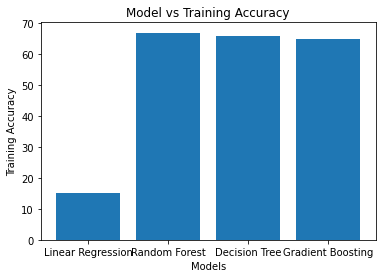

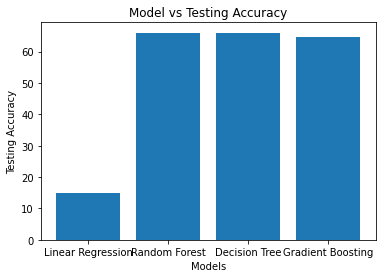

In [27]:
models = ['Linear Regression', 'Random Forest', 'Decision Tree', "Gradient Boosting"]

train_accuracy = [15, 67, 66, 65]
plt.bar(models,train_accuracy)
plt.title("Model vs Training Accuracy")
plt.xlabel("Models")
plt.ylabel("Training Accuracy")
plt.show()

test_accuracy = [15, 66, 66, 64.5]
plt.bar(models,test_accuracy)
plt.title("Model vs Testing Accuracy")
plt.xlabel("Models")
plt.ylabel("Testing Accuracy")
plt.show()

Now when we plot a bar graph of all the accuracies of each model, we see that both training and tes accuracies don't differ that much, from both the same model, and different models, except for Linear Regression. This also goes to show us that for this particular Dataset, Linear Regression is not a suitable method for model training.

## Conclusion

We have finally reached the end of this notebook, as well as the entire project. We finally  have a clear idea of how the various features present in this dataset affect the final purchase attribute, and how the different features compare with each other.

During model training we also saw how each model gave almost the same result, the exception being Linear Regression. We know that both Gradient Boosting and Random forest uses the result of a single decision tree to build their prediction for the final output. We also know that they are seperately based on variance and bias. But we still observed that they gave similar results.

We also observed that, more than the model training, there were many insights to this dataset, some of which we may not even have covered. The fact that a few features like Occupation and Product Categrories had numerical values without any explanantion to what they mean, made it difficult to extract more information. There may be better results using different approaches, or by changing a few hyper parameters as well. I shall upload them as and when possible.

In [0]:
Final_Accuracy = pd.DataFrame({"Linear Regression" : [15.18, 14.91], "Random Forest" : [66.34,65.93], "Decision Tree" : [66.32,65.93], "Gradient Boosting" : [65.76,64.53]}, index = ["Train Accuracy","Test Accuracy"])

In [31]:
Final_Accuracy

,Linear Regression,Random Forest,Decision Tree,Gradient Boosting
Train Accuracy,15.18,66.34,66.32,65.76
Test Accuracy,14.91,65.93,65.93,64.53
